In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
hdul=fits.open('C:/Users/astle/Downloads/1904-66_AIT.fits')
import pandas as pd

In [2]:
image=hdul[0].data[0][0]

In [3]:
imagedf=pd.DataFrame(data=image)
imagedf=imagedf.fillna(0)

In [6]:
hdul[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -32 / IEEE (big-endian) 32-bit floating point data   
NAXIS   =                    2                                                  
NAXIS1  =                  192                                                  
NAXIS2  =                  192                                                  
BUNIT   = 'JY/BEAM '                                                            
CTYPE1  = 'RA---AIT'                                                            
CRPIX1  =  -2.462317116277E+02                                                  
CDELT1  =  -6.666666666667E-02                                                  
CRVAL1  =   0.000000000000E+00                                                  
CTYPE2  = 'DEC--AIT'                                                            
CRPIX2  =   7.115850027049E+00                                                  
CDELT2  =   6.666666666667E-

In [7]:
a=700#logarithmic scaling for a better plot, scale 'a' till sources are visible
logged=np.log10(a*imagedf+1)/np.log10(a)

<ipython-input-7-2cc2b4c2ebdd>:2: RuntimeWarning: invalid value encountered in log10
  logged=np.log10(a*imagedf+1)/np.log10(a)


C:\Users\astle\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


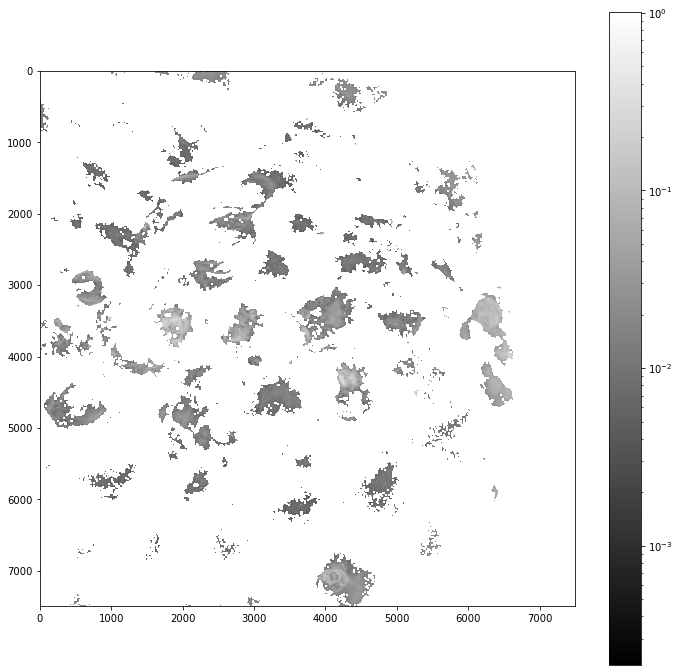

In [10]:
plt.figure(figsize=(12,12))
plt.imshow(logged,cmap='gray',norm=colors.LogNorm())#plotting
plt.colorbar()

0      -0.000019
1      -0.000020
2      -0.000020
3      -0.000020
4      -0.000021
          ...   
7495    0.000000
7496    0.000000
7497    0.000000
7498    0.000000
7499    0.000000
Length: 7500, dtype: float64

In [22]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                  241 / length of data axis 1                          
NAXIS2  =                  241 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
OBJECT  = 'No_Name '        

In [80]:
imagey[0:10,0:10].shape

(10, 10)

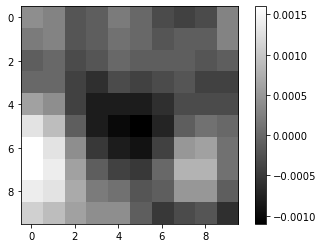

In [81]:

plt.figure()
plt.imshow(imagey[0:10,0:10],cmap='gray')
plt.colorbar()

In [28]:
imagex=np.delete(image,240,0)
imagey=np.delete(imagex,240,1)
imagey.shape

(240, 240)

In [37]:
splity=np.array_split(imagey,24,axis=1)

In [45]:
splitx=[]
for i in splity:
    tempo=np.array_split(i,24)
    splitx.append(tempo)
splitx=np.array(splitx)

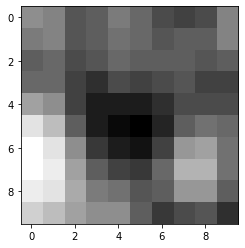

In [83]:
plt.imshow(splity[0][0:10],cmap='gray')

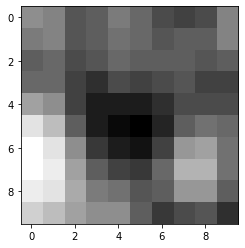

In [82]:
plt.imshow(splitx[0][0],cmap='gray')

In [70]:
splitx.shape

(24, 24, 10, 10)

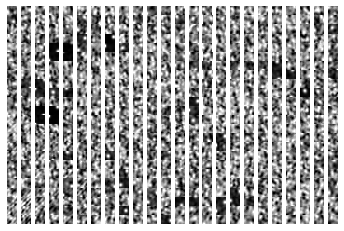

In [71]:
k=0
for i in range(24):
    for j in range(24):
        plt.subplot(24,24,k+1)
        plt.imshow(splitx[i][j],cmap='gray')
        plt.axis('off')
        k+=1
plt.subplots_adjust(wspace=0,hspace=0)